In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
import rwthcolors
import eurographics_style
import glob

39
39
39
38
39
no_state_hashing: 23.026386948717953 s
no_proactive_pruning: 70.30141282051282 s
no_balanced_priority: 300.56694871794866 s
no_advanced_lower_bounds: 300.52397368421055 s
bnb: 15.448323461538457 s


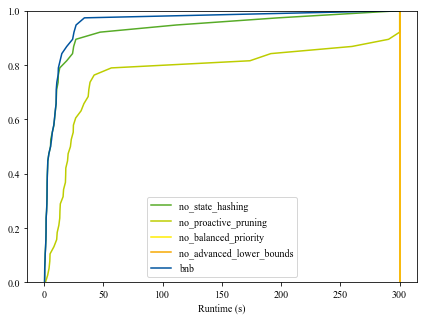

In [262]:
output_dir = '/local/born/layout-embedding-output'
bnb_ablation_output_dir = output_dir + '/bnb_ablation'
bnb_ablation_stats_path = bnb_ablation_output_dir + '/stats_shrec07.csv'

df = pd.read_csv(bnb_ablation_stats_path)

data_series = [
    {
        'name': 'no_state_hashing',
        'label': 'no_state_hashing',
        'color': 'rwth:green',
        'filter': {'state_hashing': 0, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
    },
    {
        'name': 'no_proactive_pruning',
        'label': 'no_proactive_pruning',
        'color': 'rwth:maygreen',
        'filter': {'state_hashing': 1, 'proactive_pruning': 0, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
    },
    {
        'name': 'no_balanced_priority',
        'label': 'no_balanced_priority',
        'color': 'rwth:yellow',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 0, 'advanced_lower_bounds': 1},
    },
    {
        'name': 'no_advanced_lower_bounds',
        'label': 'no_advanced_lower_bounds',
        'color': 'rwth:orange',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 0},
    },
    {
        'name': 'bnb',
        'label': 'bnb',
        'color': 'rwth:blue',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
    },
]

for ds in data_series:
    filt_keys = list(ds['filter'].keys())
    filt_vals = list(ds['filter'].values())
    def f(arg):
        return (arg[filt_keys] == filt_vals).all()
    ds['df'] = df[df.apply(f, axis=1)].copy()
    print(len(ds['df']))

for ds in data_series:
    name = ds['name']
    mean = ds['df']['runtime'].mean()
    print(f'{name}: {mean} s')
    
plt.figure(figsize=(7,5))

for ds in data_series:
    ds_df = ds['df']
    name = ds['name']
    color = ds['color']
    
    ds_df[ds_df['runtime'] > 300.0] = 300.0
    
    ascending_runtime = np.sort(ds_df['runtime'])
    percentiles = np.linspace(0, 1, len(ascending_runtime))
    plt.plot(ascending_runtime, percentiles, c=color, label=name)
    #plt.xlim((0,2))
    plt.ylim(0, 1)
plt.xlabel('Runtime (s)')
plt.legend()
plt.savefig('/home/born/Downloads/bnb_ablation.pdf')